# Librerías

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
import math
import os
import warnings
from time import time
import sys

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import offsetbox

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
import plotly.figure_factory as ff
from plotly.subplots import make_subplots


from scipy.spatial import distance
from scipy.cluster.hierarchy import linkage, dendrogram, cut_tree
from scipy.spatial.distance import jaccard
from scipy.spatial.distance import pdist, squareform


from sklearn import set_config
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering, DBSCAN, KMeans
from sklearn.metrics import pairwise_distances, jaccard_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture


from yellowbrick.cluster import SilhouetteVisualizer



# Configuración Inicial

In [3]:
random_seed = 333 # Semilla para reproducibilidad de resultados
np.random.seed( random_seed ) # Para reproducibilidad
pd.set_option('display.max_columns', None)  # Muestra todas las columnas
pd.set_option('display.max_rows', 30)

# Carga de Datos

In [4]:
df = pd.read_csv('/Users/gblasd/Documents/DataScience/03_UnsupervisedLearning/data/FIFA19-DS.csv')

# Análisis Exploratorio

In [5]:
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position
0,158023,31,94,94,110500000,565000,2202,5,4,4,4,5.70,159,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,Left,Lean,ST
1,20801,33,94,94,77000000,405000,2228,5,4,5,6,6.20,183,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,Right,Normal,ST
2,190871,26,92,93,118500000,290000,2143,5,5,5,7,5.90,150,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,Right,Lean,AM
3,192985,27,91,92,102000000,355000,2281,4,5,4,8,5.11,154,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,Right,Normal,MF
4,183277,27,91,91,93000000,340000,2142,4,4,4,7,5.80,163,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,11,12,6,8,8,Right,Normal,ST


In [7]:
df.shape

(17140, 76)

In [8]:
df.dtypes

ID                 int64
Age                int64
Overall            int64
Potential          int64
Value              int64
                   ...  
GKPositioning      int64
GKReflexes         int64
Preferred Foot    object
Body Type         object
Position          object
Length: 76, dtype: object

In [9]:
#Descripción de las variables numéricas

In [10]:
df.describe(percentiles=(.1,.5,.9,.99))

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,17140.000000,17140.000000,17140.000000,17140.000000,1.714000e+04,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,15298.000000,17140.00000,17140.000000,17140.00000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000,17140.000000
mean,214049.431855,25.150117,66.371937,71.386873,2.486680e+06,10007.526254,1604.909218,1.117095,2.957351,2.375788,4.758460,5.795376,165.956243,60.015492,60.015492,60.015492,61.267224,60.946921,60.946921,60.946921,61.267224,61.223297,61.223297,61.223297,61.964897,60.469342,60.469342,60.469342,61.964897,59.720486,59.041116,59.041116,59.041116,59.720486,58.999346,57.782521,57.782521,57.782521,58.999346,50.15811,45.875554,52.51937,59.045041,43.262427,55.765753,47.574037,43.240665,53.084714,58.738798,64.791774,64.892824,63.715811,61.987981,64.105601,55.825846,65.139907,63.495741,65.401050,47.513069,56.179055,47.009918,50.339498,53.744866,48.779055,58.876196,47.538798,48.017853,45.951750,16.399242,16.179872,16.029930,16.173454,16.485414
std,30013.910983,4.658667,6.925482,6.159271,5.731964e+06,22511.507231,272.616761,0.400711,0.661593,0.755884,1.607135,0.448955,15.545170,9.131929,9.131929,9.131929,9.869031,9.834071,9.834071,9.834071,9.869031,9.763917,9.763917,9.763917,9.247231,8.818658,8.818658,8.818658,9.247231,8.974868,10.077393,10.077393,10.077393,8.974868,9.525282,11.682026,11.682026,11.682026,9.525282,18.29100,19.455131,17.23845,14.596055,17.695322,18.785234,18.376953,17.495024,15.260262,16.571686,14.884353,14.596992,14.730155,9.019559,14.105805,17.162725,11.820453,15.839904,12.508391,19.215724,17.285448,20.633220,19.427240,14.128352,15.653902,11.444560,19.835394,21.580262,21.217484,17.408058,16.646432,16.246873,16.752596,17.668488
min,16.000000,16.000000,46.000000,48.000000,0.000000e+00,0.000000,731.000000,1.000000,1.000000,1.000000,0.000000,5.100000,110.000000,33.000000,33.000000,33.000000,27.000000,29.000000,29.000000,29.000000,27.000000,29.000000,29.000000,29.000000,29.000000,32.000000,32.000000,32.000000,29.000000,32.000000,30.000000,30.000000,30.000000,32.000000,31.000000,27.000000,27.000000,27.000000,31.000000,5.00000,2.000000,4.00000,7.000000,4.000000,4.000000,6.000000,4.000000,9.000000,8.000000,12.000000,12.000000,14.000000,21.000000,16.000000,2.000000,15.000000,12.000000,17.000000,3.000000,11.000000,3.000000,2.000000,10.000000,5.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10%,179694.900000,19.000000,57.000000,64.000000,1.400000e+05,1000.000000,1203.000000,1.000000,2.000000,1.000000,4.000000,5.100000,146.000000,47.000000,47.000000,47.000000,48.000000,47.000000,47.000000,47.000000,48.000000,48.000000,48.000000,48.000000,49.000000,49.000000,49.000000,49.000000,49.000000,48.000000,45.000000

In [11]:
df.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot',
       'Body Type', 'Position'],
      dtype='object')

In [12]:
varcat =df[['Preferred Foot', 'Body Type', 'Position']]

In [13]:
varnum = [col for col in df.columns if col not in varcat]

In [14]:
varpos = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [15]:
df_pos =df[varpos]

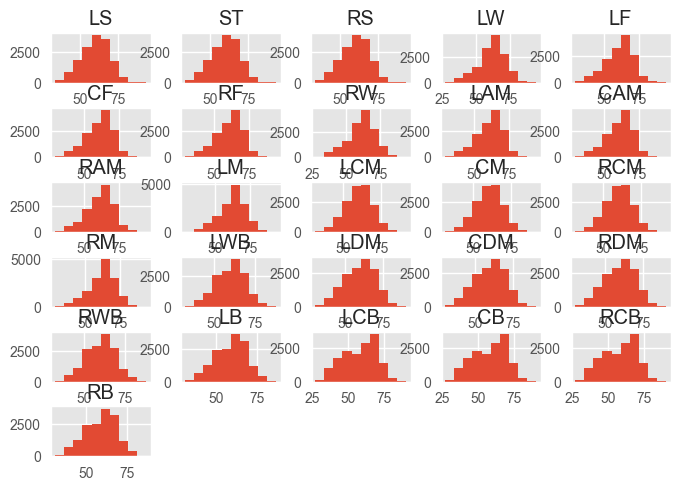

In [16]:
#Histogramas de las variables
plt.style.use('ggplot')
df_pos.hist()
plt.subplots_adjust(hspace=.5)
plt.show()


In [17]:
df[varnum].corr()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
ID,1.000000,-0.738772,-0.416086,0.044352,-0.138289,-0.204681,-0.237348,-0.357820,-0.076854,-0.062702,-0.031941,-0.049542,-0.188469,-0.305871,-0.305871,-0.305871,-0.237074,-0.264969,-0.264969,-0.264969,-0.237074,-0.277397,-0.277397,-0.277397,-0.256737,-0.371500,-0.371500,-0.371500,-0.256737,-0.299923,-0.344886,-0.344886,-0.344886,-0.299923,-0.276929,-0.290637,-0.290637,-0.290637,-0.276929,-0.138367,-0.089990,-0.113691,-0.142725,-0.168561,-0.037137,-0.175013,-0.206350,-0.190840,-0.107388,0.128362,0.127916,-0.021740,-0.408959,0.042671,-0.172614,-0.169768,-0.060460,-0.260417,-0.168740,-0.232511,-0.163150,-0.097421,-0.217775,-0.149508,-0.387435,-0.113862,-0.087983,-0.070046,-0.099090,-0.105448,-0.100372,-0.112304,-0.099446
Age,-0.738772,1.000000,0.448564,-0.251879,0.073986,0.140554,0.244527,0.254096,0.061519,0.034167,0.023741,0.048215,0.224107,0.287766,0.287766,0.287766,0.201329,0.232478,0.232478,0.232478,0.201329,0.241607,0.241607,0.241607,0.227362,0.357744,0.357744,0.357744,0.227362,0.325856,0.375492,0.375492,0.375492,0.325856,0.310833,0.337778,0.337778,0.337778,0.310833,0.140506,0.077654,0.156166,0.141413,0.152424,0.018710,0.152305,0.202576,0.188163,0.094148,-0.153409,-0.146951,-0.016864,0.450806,-0.082441,0.164797,0.176279,0.105063,0.332548,0.163642,0.270062,0.203032,0.093370,0.191984,0.151322,0.393432,0.148438,0.124391,0.107543,0.090939,0.097066,0.095193,0.106829,0.093047
Overall,-0.416086,0.448564,1.000000,0.665765,0.629903,0.574363,0.614396,0.504503,0.213679,0.422261,0.205902,0.035899,0.149917,0.678039,0.678039,0.678039,0.625356,0.653377,0.653377,0.653377,0.625356,0.668623,0.668623,0.668623,0.672635,0.777520,0.777520,0.777520,0.672635,0.638391,0.619258,0.619258,0.619258,0.638391,0.571758,0.462856,0.462856,0.462856,0.571758,0.404062,0.342392,0.345844,0.511048,0.401362,0.382246,0.428153,0.403303,0.490256,0.469759,0.203380,0.216588,0.269561,0.851298,0.110405,0.449129,0.262059,0.371855,0.345303,0.429507,0.397204,0.322946,0.367179,0.507696,0.351520,0.732870,0.289453,0.253905,0.223829,-0.031870,-0.030125,-0.034660,-0.023069,-0.028949
Potential,0.044352,-0.251879,0.665765,1.000000,0.580113,0.489907,0.387530,0.377881,0.162826,0.358024,0.159133,0.012372,-0.006587,0.442632,0.442632,0.442632,0.447415,0.459150,0.459150,0.459150,0.447415,0.471197,0.471197,0.471197,0.471971,0.500458,0.500458,0.500458,0.471971,0.375323,0.339397,0.339397,0.339397,0.375323,0.325621,0.216747,0.216747,0.216747,0.325621,0.249686,0.248120,0.200774,0.372684,0.259918,0.319421,0.283580,0.231817,0.323712,0.358174,0.236182,0.237995,0.225277,0.518130,0.139687,0.291933,0.107527,0.203609,0.072679,0.271022,0.170319,0.153036,0.249446,0.354827,0.227208,0.444955,0.161729,0.141711,0.126860,-0.051669,-0.052903,-0.057213,-0.051209,-0.051575
Value,-0.138289,0.073986,0.629903,0.580113,1.000000,0.859372,0.379149,0.656477,0.165628,0.317913,0.168128,0.012690,0.045130,0.467054,0.467054,0.467054,0.448024,0.464950,0.464950,0.464950,0.448024,0.471529,0.471529,0.471529,0.470539,0.503882,0.503882,0.503882,0.470539,0.363886,0.335773,0.335773,0.335773,0.363886,0.311476,0.215721,0.215721,0.215721,0.311476,0.252035,0.259357,0.184454,0.330185,0.290424,0.274822,0.288842,0.266598,0.303521,0.311680,0.172351,0.174444,0.196128,0.543470,0.115664,0.283000,0.123086,0.211370,0.126442,0.281344,0.182501,0.139405,0.262084,0.360885,0.241892,0.452509,0.133487,0.106728,0.085832,-0.027453,-0.027622,-0.029611,-0.026650,-0.027283
...,...,...,...,...,...,..

In [18]:
# Variables por delantero, medio y defensa
del_pos=['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW']
cen_pos=['LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM']
def_pos=['RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [19]:
# Variables por Izquierdo, Derecho y Central
l_pos=['LS', 'LW', 'LF','LAM', 'LM', 'LCM', 'LWB', 'LDM','LB', 'LCB']
r_pos=['RS','RF', 'RW','RAM', 'RCM', 'RM', 'RDM', 'RWB','RCB', 'RB']
c_pos=['ST','CF','CAM','CM','CDM','CB']

In [20]:
# Características de jugadores y porteros
car_j=[ 'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure','Marking', 'StandingTackle', 'SlidingTackle']
car_p=['GKDiving', 'GKHandling','GKKicking', 'GKPositioning', 'GKReflexes']

In [21]:
matriz_correlaciones = df[varpos].corr()

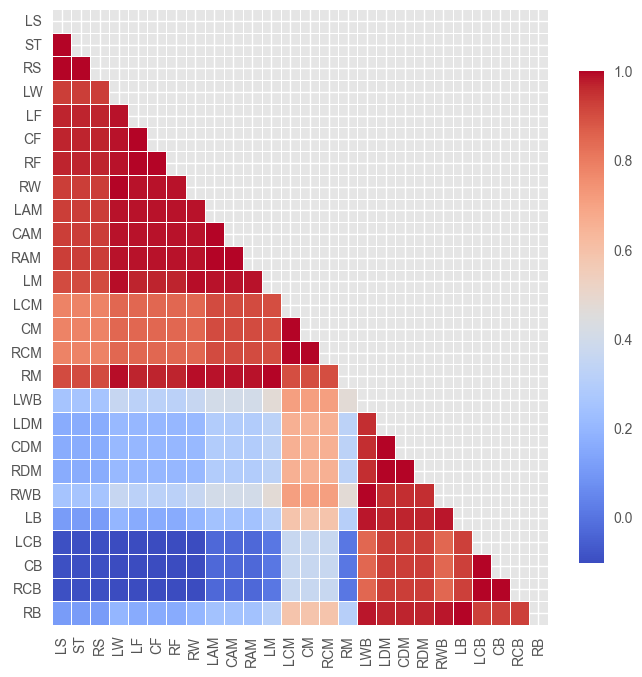

In [22]:
# Matriz de corrlaciones con estilo de mapa de calor
mask = np.triu(np.ones_like(matriz_correlaciones, dtype=bool))

plt.figure(figsize=(8,8))
sns.heatmap(
    matriz_correlaciones,
    #annot=True,              
    cmap='coolwarm',          
    fmt=".2f",              
    linewidths=.5,            
    mask=mask,                
    cbar_kws={"shrink": .8}   
)
plt.show()

In [23]:
# Matriz de gráficos de dispersión de variables de interés
fig = px.scatter_matrix(df,
    dimensions=['RS','RF', 'RW','RAM', 'RCM', 'RM', 'RDM', 'RWB','RCB', 'RB'],
    title="Dispersión de calificaciones por posición",
    width=1000,  
    height=800,
)

fig.update_traces(diagonal_visible=False, marker=dict(size=5))

fig.show()

# Ingeniería de variables

In [24]:
#Se crea una variable para asignar una calificación de portero "GK"
df['GK']= df[car_p].mean(axis=1)

In [25]:
#Se añade la calificación como portero a la lista de posiciones
varpos =varpos + ['GK']
varpos

['LS',
 'ST',
 'RS',
 'LW',
 'LF',
 'CF',
 'RF',
 'RW',
 'LAM',
 'CAM',
 'RAM',
 'LM',
 'LCM',
 'CM',
 'RCM',
 'RM',
 'LWB',
 'LDM',
 'CDM',
 'RDM',
 'RWB',
 'LB',
 'LCB',
 'CB',
 'RCB',
 'RB',
 'GK']

In [26]:
# Se crea una variable con la mejor calificación por posición del jugador y la posición que arroja
df['bst_cal'] = df[varpos].max(axis=1)
df['best_pos'] = df[varpos].idxmax(axis=1)

In [27]:
df['best_pos'].value_counts()

best_pos
LCB    3400
LW     3004
LS     2369
LWB    2076
GK     1842
LDM    1158
LAM    1103
LM      799
LCM     738
LB      406
LF      245
Name: count, dtype: int64

In [28]:
df['Position'].value_counts()

Position
DF    5525
MF    4205
ST    2496
GK    1842
AM    1680
DM    1392
Name: count, dtype: int64

In [29]:
# Calificacion global defensa, central y delantero
df['del_cal']= df[del_pos].mean(axis=1).fillna(0)
df['cen_cal']= df[cen_pos].mean(axis=1).fillna(0)
df['def_cal']= df[def_pos].mean(axis=1).fillna(0)

In [30]:
# Clasifiación para jugadores de élite que tengan una calificación mayor que el 90% de jugadores
df['elite'] = (df['bst_cal'] >= df['bst_cal'].quantile(0.90)).astype(int)

In [31]:
df['elite'].value_counts()

elite
0    15255
1     1885
Name: count, dtype: int64

In [32]:
df.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot',
       'Body Type', 'Position', 'GK', 'bst_cal', 'best_pos', 'del_cal',
       'cen_cal', 'def_cal', 'elite'],
    

In [33]:
df['Body Type'].value_counts()

Body Type
Normal    9990
Lean      6080
Stocky    1070
Name: count, dtype: int64

In [34]:
df['Preferred Foot'].value_counts()

Preferred Foot
Right    13156
Left      3984
Name: count, dtype: int64

In [35]:
#Catálogo de tipo de cuerpo
dict_bt = {
    'Normal': 1,
    'Lean': 2,
    'Stocky': 3
}

In [36]:
df['cat_bt'] = df['Body Type'].map(dict_bt )

In [37]:
#Catálogo de pie preferido
dict_pf = {
    'Right': 1,
    'Left': 2
}

In [38]:
df['cat_pf'] = df['Preferred Foot'].map(dict_bt)

In [39]:
#catálogo de mejores posiciones
df['best_pos'].value_counts()

best_pos
LCB    3400
LW     3004
LS     2369
LWB    2076
GK     1842
LDM    1158
LAM    1103
LM      799
LCM     738
LB      406
LF      245
Name: count, dtype: int64

In [40]:
# Catálogo de posiciones
dict_pos={
    'LCB': 1,
    'LW': 2,
    'LS': 3,  
    'LWB': 4,  
    'GK': 5,   
    'LDM': 6,
    'LAM': 7, 
    'LM': 8,    
    'LCM': 9,   
    'LB': 10,     
    'LF': 11
}

In [41]:
df['cat_pos'] = df['best_pos'].map(dict_pos)

In [42]:
df.columns

Index(['ID', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Height', 'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW',
       'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM',
       'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Crossing',
       'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Preferred Foot',
       'Body Type', 'Position', 'GK', 'bst_cal', 'best_pos', 'del_cal',
       'cen_cal', 'def_cal', 'elite', 'cat_

 Selección de variables inicial
varfin=['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Height', 'Weight', 'Crossing','Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling',
       'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression','Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle','bst_cal', 'del_cal', 'cen_cal', 'def_cal','GK', 'elite', 'cat_pos'
      ]

In [43]:
# Selección de variables finales
varfin=['Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special', 'International Reputation',
       'Height', 'Weight', 'bst_cal', 'del_cal', 'cen_cal', 'def_cal','GK', 'elite', 'cat_pos'
       ]

In [44]:
df.head()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos
0,158023,31,94,94,110500000,565000,2202,5,4,4,4,5.70,159,90.0,90.0,90.0,94.0,95.0,95.0,95.0,94.0,95.0,95.0,95.0,93.0,86.0,86.0,86.0,93.0,66.0,63.0,63.0,63.0,66.0,61.0,49.0,49.0,49.0,61.0,84,95,70,90,86,97,93,94,87,96,91,86,91,95,95,85,68,72,59,94,48,22,94,94,75,96,33,28,26,6,11,15,14,8,Left,Lean,ST,10.8,95.0,LF,92.875,82.000000,55.833333,1,2,NaN,11
1,20801,33,94,94,77000000,405000,2228,5,4,5,6,6.20,183,94.0,94.0,94.0,92.0,93.0,93.0,93.0,92.0,91.0,91.0,91.0,91.0,84.0,84.0,84.0,91.0,68.0,64.0,64.0,64.0,68.0,64.0,56.0,56.0,56.0,64.0,84,94,89,81,87,88,81,76,77,94,89,91,87,96,70,95,95,88,79,93,63,29,95,82,85,95,28,31,23,7,11,15,14,11,Right,Normal,ST,11.6,94.0,LS,93.125,80.583333,60.666667,1,1,NaN,3
2,190871,26,92,93,118500000,290000,2143,5,5,5,7,5.90,150,87.0,87.0,87.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,92.0,91.0,84.0,84.0,84.0,91.0,68.0,63.0,63.0,63.0,68.0,63.0,50.0,50.0,50.0,63.0,79,87,62,84,84,96,88,87,78,95,94,90,96,94,84,80,61,81,49,82,56,36,89,87,81,94,27,24,33,9,9,15,15,11,Right,Lean,AM,11.8,92.0,LW,90.125,80.583333,57.333333,1,2,NaN,2
3,192985,27,91,92,102000000,355000,2281,4,5,4,8,5.11,154,85.0,85.0,85.0,90.0,90.0,90.0,90.0,90.0,91.0,91.0,91.0,91.0,90.0,90.0,90.0,91.0,80.0,80.0,80.0,80.0,80.0,76.0,69.0,69.0,69.0,76.0,93,82,55,92,82,86,85,83,91,91,78,76,79,91,77,91,63,90,75,91,76,61,87,94,79,88,68,58,51,15,13,5,10,13,Right,Normal,MF,11.2,91.0,LAM,88.125,87.083333,73.166667,1,1,NaN,7
4,183277,27,91,91,93000000,340000,2142,4,4,4,7,5.80,163,86.0,86.0,86.0,92.0,91.0,91.0,91.0,92.0,92.0,92.0,92.0,92.0,85.0,85.0,85.0,92.0,69.0,66.0,66.0,66.0,69.0,63.0,52.0,52.0,52.0,63.0,81,84,61,89,80,95,83,79,83,94,94,88,95,90,94,82,56,83,66,80,54,41,87,89,86,91,34,27,22,11,12,6,8,8,Right,Normal,ST,9.0,92.0,LW,89.375,81.833333,58.500000,1,1,NaN,2


In [45]:
X=df.copy()

In [46]:
X=X[varfin]

In [47]:
X.shape

(17140, 16)

In [48]:
X.isna().sum()

Age                         0
Overall                     0
Potential                   0
Value                       0
Wage                        0
Special                     0
International Reputation    0
Height                      0
Weight                      0
bst_cal                     0
del_cal                     0
cen_cal                     0
def_cal                     0
GK                          0
elite                       0
cat_pos                     0
dtype: int64

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Implementación de Modelos

## K Means

In [50]:
distortions = []; silhouette_scores = []
davies_bouldin_scores = []; calinski_harabasz_scores = []
range_n_clusters = range(2, 8)  # Ajustamos para explorar desde 1 hasta 7 clusters

for n_clusters in range_n_clusters:
   km = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10, max_iter=300, random_state=random_seed)
   cluster_labels = km.fit_predict(X_scaled); distortions.append(km.inertia_)
   silhouette_ = silhouette_score(X_scaled, cluster_labels); silhouette_scores.append(silhouette_)
   davies_bouldin_ = davies_bouldin_score(X_scaled, cluster_labels); davies_bouldin_scores.append(davies_bouldin_)
   calinski_harabasz_ = calinski_harabasz_score(X_scaled, cluster_labels); calinski_harabasz_scores.append(calinski_harabasz_)

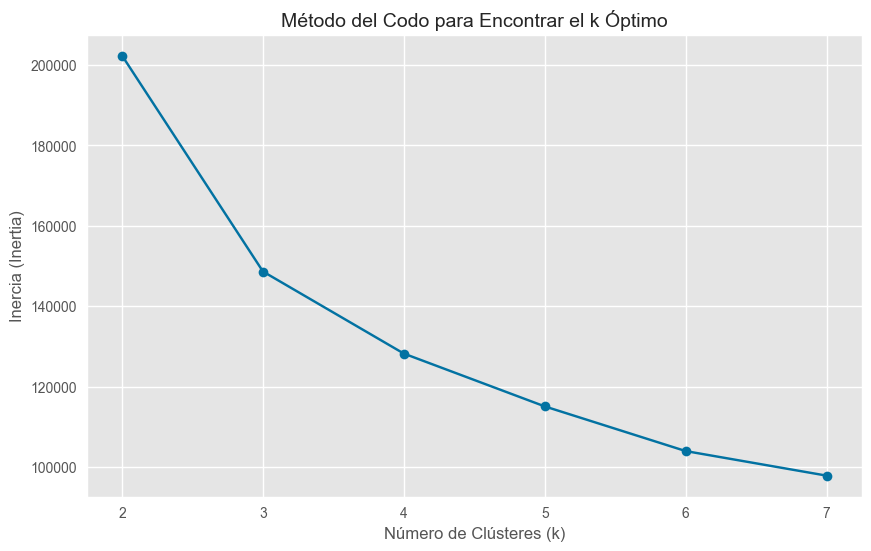

In [51]:
# Diagrama de codo
plt.figure(figsize=(10, 6))
plt.plot(range_n_clusters, distortions, marker='o', linestyle='-', color='b')

plt.xlabel('Número de Clústeres (k)', fontsize=12)
plt.ylabel('Inercia (Inertia)', fontsize=12)
plt.title('Método del Codo para Encontrar el k Óptimo', fontsize=14)
plt.xticks(range_n_clusters)
plt.grid(True)

plt.show()

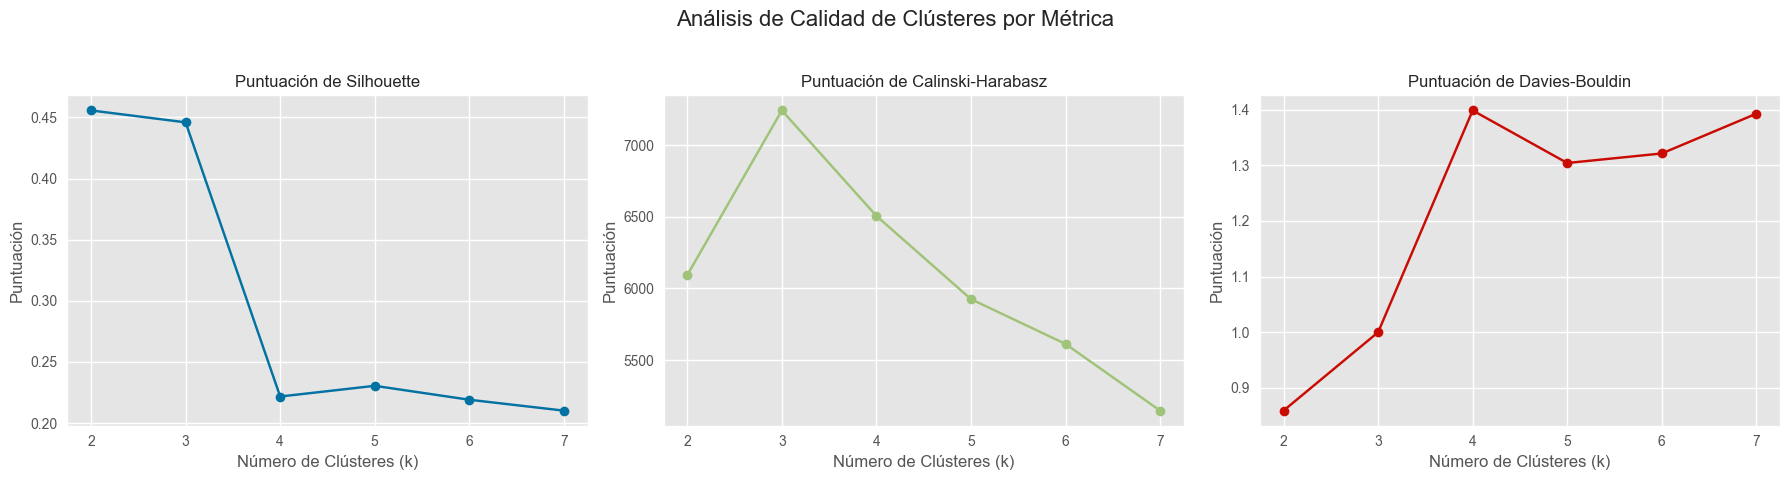

In [52]:
# Graficar las 3 métricas
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Análisis de Calidad de Clústeres por Métrica', fontsize=16)

# Silhouette Score
ax1.plot(range_n_clusters, silhouette_scores, marker='o', color='b')
ax1.set_title('Puntuación de Silhouette', fontsize=12)
ax1.set_xlabel('Número de Clústeres (k)')
ax1.set_ylabel('Puntuación')
ax1.grid(True)

#Calinski Harabasz
ax2.plot(range_n_clusters, calinski_harabasz_scores, marker='o', color='g')
ax2.set_title('Puntuación de Calinski-Harabasz', fontsize=12)
ax2.set_xlabel('Número de Clústeres (k)')
ax2.set_ylabel('Puntuación')
ax2.grid(True)

#Davies Bouldin
ax3.plot(range_n_clusters, davies_bouldin_scores, marker='o', color='r')
ax3.set_title('Puntuación de Davies-Bouldin', fontsize=12)
ax3.set_xlabel('Número de Clústeres (k)')
ax3.set_ylabel('Puntuación')
ax3.grid(True)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

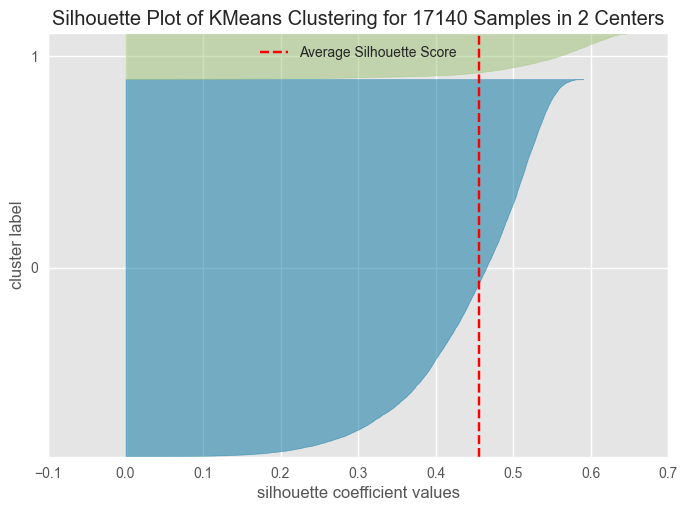

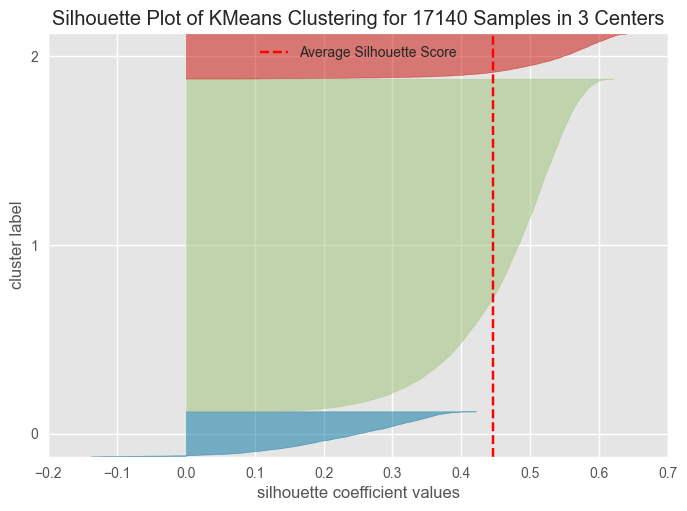

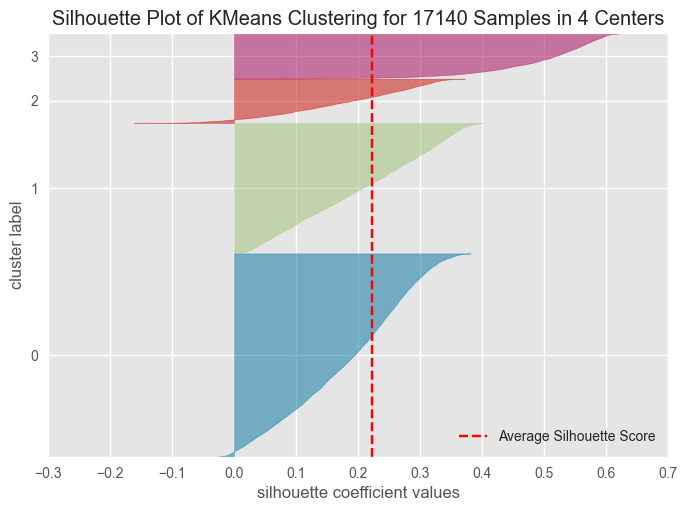

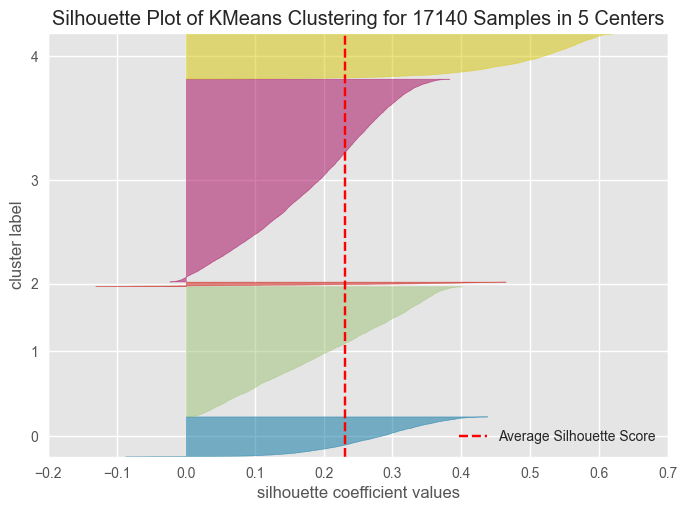

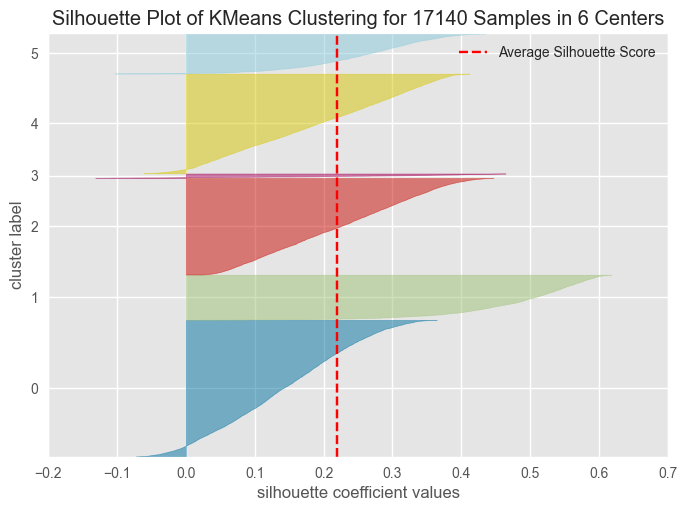

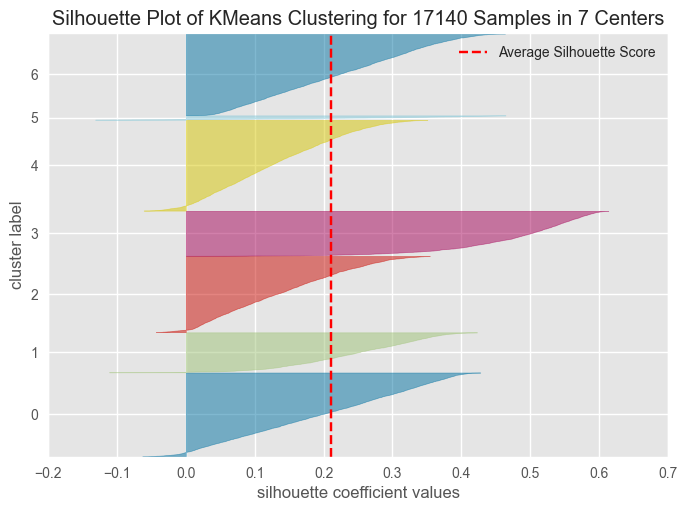

In [53]:
for i in range(2, 8):
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=random_seed)
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
    visualizer.fit(X_scaled)
    visualizer.show()


In [54]:
# Basandonos en los resultados de las métricas, se toman 2 clusters
# Generamos K Means con 2 Clusters
km = KMeans(n_clusters=3, init='k-means++',
            n_init=10, max_iter=300, random_state=random_seed)
km.fit(X_scaled)

KMeans(n_clusters=3, n_init=10, random_state=333)

### Análisis de Clusters

In [55]:
# Obtener los clusters predichos por el modelo
clusters = km.predict(X_scaled)

# Asignarlos como nueva columna en df
df['cluster'] = clusters

In [56]:
df['cluster'].value_counts()

cluster
1    13480
0     1833
2     1827
Name: count, dtype: int64

In [57]:
df.groupby('cluster').describe()

ID                                                            \
           count           mean           std     min        25%       50%   
cluster                                                                      
0         1833.0  197623.843426  28030.376134    41.0  186132.00  201024.0   
1        13480.0  217058.456677  27956.818576    16.0  203454.75  224369.5   
2         1827.0  208327.729064  39079.140673  2147.0  192258.50  218971.0   

                                  Age                                         \
               75%       max    count       mean       std   min   25%   50%   
cluster                                                                        
0        214947.00  246069.0   1833.0  27.045281  3.807115  17.0  24.0  27.0   
1        237764.25  246620.0  13480.0  24.786350  4.568126  16.0  21.0  24.0   
2        235631.00  246603.0   1827.0  25.932677  5.470959  16.0  21.0  25.0   

                     Overall                                               \
          75%   max    count       mean       std   min   25%   50%   75%   
cluster                                                                     
0        30.0  40.0   1833.0  78.060011  3.456324  71.0  76.0  77.0  80.0   
1        28.0  41.0  13480.0  65.051558  5.569751  46.0  62.0  66.0  69.0   
2        30.0  44.0   1827.0  64.387521  7.433150  47.0  59.0  64.0  69.0   

              Potential                                                     \
          max     count       mean       std   min   25%   50%   75%   max   
cluster                                                                      
0        94.0    1833.0  80.204583  4.281592  71.0  77.0  80.0  83.0  95.0   
1        75.0   13480.0  70.416172  5.347799  48.0  67.0  70.0  74.0  89.0   
2        84.0    1827.0  69.702244  6.223301  48.0  66.0  69.0  74.0  93.0   

           Value                                                         \
           count          mean           std  min        25%        50%   
cluster                                                                   
0         1833.0  1.332776e+07  1.228841e+07  0.0  7000000.0  9500000.0   
1        13480.0  1.168570e+06  1.461229e+06  0.0   325000.0   625000.0   
2         1827.0  1.335301e+06  2.998220e+06  0.0   140000.0   375000.0   

                                     Wage                                   \
                75%          max    count          mean           std  min   
cluster                                                                      
0        14500000.0  118500000.0   1833.0  47660.120022  51733.335686  0.0   
1         1300000.0   12000000.0  13480.0   5455.637982   7049.334231  0.0   
2          925000.0   29000000.0   1827.0   5816.091954  10532.279879  0.0   

                                              Special               \
             25%      50%      75%       max    count         mean   
cluster                                                              
0        20000.0  31000.0  55000.0  565000.0   1833.0  1936.033824   
1         1000.0   3000.0   6000.0   71000.0  13480.0  1636.228190   
2         1000.0   2000.0   5000.0  105000.0   1827.0  1041.619048   

                                                             \
                std     min     25%     50%     75%     max   
cluster                                                       
0        146.037035  1254.0  1857.0  1952.0  2037.0  2346.0   
1        174.313491  1000.0  1512.0  1647.0  1766.0  2069.0   
2        130.794520   731.0   941.0  1058.0  1135.0  1458.0   

        International Reputation                                               \
                           count      mean       std  min  25%  50%  75%  max   
cluster                                                                         
0                         1833.0  1.801964  0.813744  1.0  1.0  2.0  2.0  5.0   
1                        13480.0  1.028858  0.169176  1.0  1.0  1.0  1.0  3.0   
2      

In [58]:
df.groupby('cluster').mean(numeric_only=True)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,GK,bst_cal,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos
cluster,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,197623.843426,27.045281,78.060011,80.204583,1.332776e+07,47660.120022,1936.033824,1.801964,3.276050,3.147300,5.532460,5.774812,167.345336,70.963146,70.963146,70.963146,72.562156,72.666117,72.666117,72.666117,72.562156,73.129813,73.129813,73.129813,73.188119,72.484598,72.484598,72.484598,73.188119,69.316832,69.268977,69.268977,69.268977,69.316832,67.988999,66.199670,66.199670,66.199670,67.988999,66.266776,61.082924,64.721222,74.823786,59.555919,72.795963,65.092744,58.513912,68.320786,75.694490,71.890344,71.885979,71.997818,75.515003,69.392799,72.221495,69.651391,74.404801,70.339334,65.182215,69.093290,59.627387,66.759956,68.679214,61.402619,74.298418,59.611020,59.527550,56.056738,11.205128,11.190944,11.192580,11.180033,11.157665,11.185270,79.095799,71.412302,71.108565,66.764775,0.980906,1.496999,NaN,4.207310
1,217058.456677,24.786350,65.051558,70.416172,1.168570e+06,5455.637982,1636.228190,1.028858,2.977226,2.457344,4.756009,5.748702,163.775519,58.539021,58.539021,58.539021,59.743917,59.366395,59.366395,59.366395,59.743917,59.617507,59.617507,59.617507,60.451261,58.848887,58.848887,58.848887,60.451261,58.426261,57.661721,57.661721,57.661721,58.426261,57.786944,56.647329,56.647329,56.647329,57.786944,52.837908,48.406751,56.031973,61.217433,45.241766,59.143991,49.655119,45.067804,54.725371,61.708531,67.454599,67.525371,65.832715,60.600445,66.262982,58.118546,65.574258,66.523294,65.384644,49.848220,58.468917,49.373665,53.414095,53.994362,50.978412,58.668769,50.299036,51.049036,48.904377,10.501039,10.554748,10.546142,10.531677,10.512611,10.529243,66.094139,59.150510,58.976094,57.323689,0.000074,1.493101,NaN,3.830861
2,208327.729064,25.932677,64.387521,69.702244,1.335301e+06,5816.091954,1041.619048,1.081007,2.490969,1.000000,4.000000,6.160378,180.652436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.224412,11.942529,14.360701,27.186097,12.311440,13.754242,14.643131,14.436234,25.693487,19.816092,38.022989,38.453202,39.787630,58.654078,42.883415,22.460317,57.408867,30.212917,60.567597,12.556650,26.327313,16.910783,11.180077,36.920635,19.886700,44.933771,15.061303,14.105638,14.028462,65.128626,62.688560,61.343733,62.809524,65.899288,63.573946,63.573946,0.000000,0.000000,0.000000,0.047072,1.362343,NaN,5.000000


In [59]:
df.groupby(['cluster','Position']).mean(numeric_only=True)

ID        Age    Overall  Potential  \
cluster Position                                                   
0       AM        201059.653680  26.415584  78.333333  80.722944   
        DF        197813.242370  27.337522  77.971275  80.053860   
        DM        193788.054945  27.890110  77.785714  79.456044   
        GK        178022.266667  28.533333  87.000000  89.000000   
        MF        201315.541667  26.197464  77.740942  80.346014   
        ST        191053.412162  27.972973  78.324324  79.834459   
1       AM        221647.502415  23.919255  65.294686  71.699103   
        DF        215463.993357  25.305757  65.202496  70.030193   
        DM        214756.397521  25.530579  65.926446  70.697521   
        MF        218078.084314  24.256775  64.571585  70.336436   
        ST        217209.619545  24.654545  64.866364  70.420455   
2       GK        208327.729064  25.932677  64.387521  69.702244   

                         Value           Wage      Special  \
cluster Position                                             
0       AM        1.622078e+07   53138.528139  1958.805195   
        DF        1.089336e+07   45816.876122  1882.960503   
        DM        1.116538e+07   42961.538462  1992.120879   
        GK        3.830000e+07  147733.333333  1337.800000   
        MF        1.371662e+07   44201.086957  1993.380435   
        ST        1.498986e+07   51121.621622  1907.020270   
1       AM        1.371208e+06    5820.565908  1663.857833   
        DF        1.022659e+06    5234.702093  1585.650161   
        DM        1.188843e+06    5519.834711  1720.525620   
        MF        1.206077e+06    5178.483438  1692.827539   
        ST        1.291173e+06    6139.090909  1591.900455   
2       GK        1.335301e+06    5816.091954  1041.619048   

                  International Reputation  Weak Foot  Skill Moves  Work Rate  \
cluster Position                                                                
0       AM                        1.848485   3.515152     3.818182   5.714286   
        DF                        1.752244   2.994614     2.554758   5.317774   
        DM                        1.758242   3.214286     2.917582   4.785714   
        GK                        3.266667   2.866667     1.000000   4.000000   
        MF                        1.730072   3.384058     3.478261   5.797101   
        ST                        1.945946   3.476351     3.371622   5.837838   
1       AM                        1.026225   3.160801     2.874396   4.968254   
        DF                        1.028180   2.813808     2.181159   4.504831   
        DM                        1.030579   2.970248     2.346281   4.397521   
        MF                        1.023542   3.078018     2.668218   4.978100   
        ST                        1.040000   3.061818     2.517273   5.011818   
2       GK                        1.081007   2.490969     1.000000   4.000000   

                    Height      Weight         LS         ST         RS  \
cluster Position                                                          
0       AM        5.622165  160.142857  74.822511  74.822511  74.822511   
        DF        5.893285  172.804309  63.822262  63.822262  63.822262   
        DM        5.767473  168.840659  69.032967  69.032967  69.032967   
        GK        6.300000  190.000000        NaN        NaN        NaN   
        MF        5.694312  161.820652  73.210145  73.210145  73.210145   
        ST        5.799020  170.929054  78.385135  78.385135  78.385135   
1       AM        5.628475  155.460317  62.604555  62.604555  62.604555   
        DF        5.846775  168.186192  52.414654  52.414654  52.414654   
        DM        5.704438  163.679339  58.575207  58.575207  58.575207   
        MF        5.639885  158.220914  61.180400  61.180400  61.180400   
        ST        5.811450  168.568182  65.285455  65.285455  65.285455   
2       GK        6.160378  180.652436        NaN        NaN        NaN   

                     

In [60]:
df[df['cluster']==0].groupby('Position').count()

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos,cluster
Position,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AM,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,231,0,231,231
DF,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,557,0,557,557
DM,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,182,0,182,182
GK,15,15,15,15,15,15,15,15,15,15,15,15,15,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,0,15,15
MF,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,552,0,552,552
ST,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,296,0,296,296


In [61]:
df[df['cluster']==0].sample(20)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos,cluster
1348,228579,21,76,84,9500000,36000,1952,2,4,4,7,6.00,174,67.0,67.0,67.0,73.0,71.0,71.0,71.0,73.0,72.0,72.0,72.0,75.0,73.0,73.0,73.0,75.0,77.0,74.0,74.0,74.0,77.0,76.0,72.0,72.0,72.0,76.0,79,50,59,77,53,78,73,49,66,77,78,78,76,79,71,62,65,75,68,46,61,76,62,66,59,74,69,74,70,8,9,13,12,14,Right,Lean,DF,11.2,77.0,LWB,70.000,73.666667,74.166667,1,2,NaN,4,0
380,219985,26,80,81,14500000,63000,2052,2,3,4,8,6.20,179,76.0,76.0,76.0,78.0,79.0,79.0,79.0,78.0,80.0,80.0,80.0,80.0,82.0,82.0,82.0,80.0,79.0,80.0,80.0,80.0,79.0,78.0,78.0,78.0,78.0,78.0,71,61,75,83,62,84,64,58,79,84,74,69,66,83,56,78,67,81,75,77,72,76,74,81,56,81,76,77,73,4,4,4,4,4,Right,Lean,MF,4.0,82.0,LCM,77.625,80.416667,78.166667,1,2,NaN,9,0
142,220971,23,83,88,34000000,120000,2082,2,4,4,7,5.80,141,75.0,75.0,75.0,81.0,81.0,81.0,81.0,81.0,84.0,84.0,84.0,81.0,83.0,83.0,83.0,81.0,75.0,78.0,78.0,78.0,75.0,72.0,68.0,68.0,68.0,72.0,62,74,42,88,71,88,64,70,78,88,78,60,89,82,90,76,53,82,58,73,78,75,74,81,58,79,68,62,61,7,14,15,14,9,Right,Lean,MF,11.8,84.0,LAM,78.750,81.000000,70.500000,1,2,NaN,7,0
1472,182579,33,75,75,0,0,2012,1,3,3,5,6.10,181,70.0,70.0,70.0,69.0,70.0,70.0,70.0,69.0,70.0,70.0,70.0,69.0,72.0,72.0,72.0,69.0,73.0,75.0,75.0,75.0,73.0,73.0,77.0,77.0,77.0,73.0,67,62,74,70,73,67,62,59,66,71,63,61,62,69,63,74,71,75,79,74,88,80,69,68,63,72,72,76,72,16,11,13,14,8,Right,Normal,DM,12.4,77.0,LCB,69.750,71.833333,75.000000,1,1,NaN,1,0
968,193714,30,77,77,6500000,13000,1736,2,3,2,5,6.10,176,54.0,54.0,54.0,54.0,53.0,53.0,53.0,54.0,55.0,55.0,55.0,57.0,62.0,62.0,62.0,57.0,70.0,72.0,72.0,72.0,70.0,72.0,77.0,77.0,77.0,72.0,67,30,80,67,44,45,47,31,61,63,43,62,58,72,60,59,89,71,80,44,82,77,30,56,37,71,75,75,76,10,14,7,14,10,Right,Normal,DF,11.0,77.0,LCB,53.625,62.583333,74.166667,1,1,NaN,1,0
1158,205897,23,76,81,8500000,38000,1934,1,3,3,4,6.10,168,69.0,69.0,69.0,70.0,71.0,71.0,71.0,70.0,73.0,73.0,73.0,71.0,76.0,76.0,76.0,71.0,72.0,76.0,76.0,76.0,72.0,73.0,75.0,75.0,75.0,73.0,58,55,71,78,53,74,51,38,79,78,62,69,71,70,65,75,70,69,75,67,74,72,62,76,49,68,70,77,74,12,9,15,8,8,Right,Lean,DM,10.4,76.0,LCM,70.000,74.083333,73.833333,1,2,NaN,9,0
946,53914,35,77,77,2100000,53000,1835,2,3,2,5,5.11,192,57.0,57.0,57.0,53.0,55.0,55.0,55.0,53.0,55.0,55.0,55.0,55.0,61.0,61.0,61.0,55.0,67.0,71.0,71.0,71.0,67.0,69.0,77.0,77.0,77.0,69.0,55,30,77,70,44,49,55,31,66,60,40,51,45,72,61,69,81,50,77,54,79,77,48,39,55,76,78,77,76,32,33,38,32,34,Right,Normal,DF,33.8,77.0,LCB,55.250,61.500000,72.666667,1,1,NaN,1,0
1060,200197,28,76,76,8000000,23000,1834,1,3,3,4,5.11,168,77.0,77.0,77.0,71.0,73.0,73.0,73.0,71.0,70.0,70.0,70.0,69.0,66.0,66.0,66.0,69.0,56.0,56.0,56.0,56.0,56.0,54.0,52.0,52.0,52.0,54.0,55,80,80,68,77,65,55,54,60,78,64,61,76,78,57,76,84,74,68,72,49,43,83,45,74,79,33,30,27,13,10,15,15,15,Right,Normal,ST,13.6,77.0,LS,74.000,64.166667,53.333333,1,1,NaN,3,0
1553,206427,27,75,76,6000000,1000,1871,1,4,3,7,6.00,159,62.0,62.0,62.0,68.0,66.0,66.0,66.0,68.0,68.0,68.0,68.0,70.0,69.0,69.0,69.0,70.0,76.0,73.0,73.0,73.0,76.0,76.0,73.0,73.0,73.0,76.0,74,34,56,71,45,68,61,29,63,70,80,78,76,76,66,66,76,77,63,60,67,75,62,63,36,63,78,72,77,12,6,10,15,9,Right,Lean,DF,10.4,76.0,LWB,65.000,70.500000,74.500000,1,2,NaN,4,0
278,228702,21,81,89,26000000,19000,2064,1,3,4,4,5.11,154,71.0,71.0,71.0,78.0,77.0,77.0,77.0,78.0,81.0,81.0,81.0,80.0,82.0,82.0,82.0,80.0,79.

In [62]:
df[(df['Overall']==74) & (df['Position']=='ST') & (df['cluster']==0)].head(3)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos,cluster
1858,198420,26,74,74,6000000,13000,1867,1,4,3,3,5.80,157,74.0,74.0,74.0,76.0,76.0,76.0,76.0,76.0,75.0,75.0,75.0,74.0,67.0,67.0,67.0,74.0,59.0,56.0,56.0,56.0,59.0,57.0,53.0,53.0,53.0,57.0,63,73,66,68,65,75,49,51,59,75,91,92,83,65,83,74,92,66,62,73,72,36,74,72,65,77,41,33,34,3,3,3,3,3,Right,Normal,ST,3.0,76.0,LW,75.25,66.750000,55.333333,1,1,NaN,2,0
1930,228666,25,74,75,6500000,9000,1821,1,3,4,4,5.11,170,71.0,71.0,71.0,76.0,75.0,75.0,75.0,76.0,74.0,74.0,74.0,75.0,67.0,67.0,67.0,75.0,55.0,51.0,51.0,51.0,55.0,50.0,42.0,42.0,42.0,50.0,68,68,39,66,66,83,73,76,62,76,84,81,77,68,76,80,65,71,68,76,50,23,71,70,56,71,30,21,19,11,10,14,10,13,Left,Normal,ST,11.6,76.0,LW,73.75,65.083333,46.833333,1,1,NaN,2,0
1972,25420,39,74,74,1600000,18000,1823,3,4,4,3,6.00,185,76.0,76.0,76.0,73.0,76.0,76.0,76.0,73.0,76.0,76.0,76.0,71.0,73.0,73.0,73.0,71.0,53.0,59.0,59.0,59.0,53.0,50.0,53.0,53.0,53.0,50.0,62,78,76,75,73,76,76,65,74,78,38,34,65,77,54,75,64,50,78,70,68,33,81,78,81,86,36,33,24,8,7,11,11,14,Right,Normal,ST,10.2,76.0,LS,75.25,68.250000,52.000000,1,1,NaN,3,0


In [63]:
df[(df['Overall']==74) & (df['Position']=='ST') & (df['cluster']==1)].head(3)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos,cluster
1829,213761,27,74,74,6000000,35000,1757,1,3,3,3,5.10,179,74.0,74.0,74.0,71.0,72.0,72.0,72.0,71.0,70.0,70.0,70.0,70.0,63.0,63.0,63.0,70.0,50.0,48.0,48.0,48.0,50.0,47.0,43.0,43.0,43.0,47.0,64,80,71,66,66,70,74,56,57,73,72,73,65,55,68,76,67,62,75,70,54,20,77,65,65,66,29,16,17,9,11,9,15,10,Right,Normal,ST,10.8,74.0,LS,72.500,61.083333,45.500000,0,1,NaN,3,1
1838,198150,27,74,74,6000000,1000,1860,1,3,3,8,5.11,168,74.0,74.0,74.0,70.0,73.0,73.0,73.0,70.0,72.0,72.0,72.0,70.0,70.0,70.0,70.0,70.0,57.0,60.0,60.0,60.0,57.0,55.0,55.0,55.0,55.0,55.0,46,74,78,77,74,70,66,50,72,71,66,68,63,75,71,78,69,74,62,65,80,32,74,64,69,81,42,41,33,11,6,11,16,12,Right,Normal,ST,11.2,74.0,LS,72.625,66.916667,55.333333,0,1,NaN,3,1
1839,210439,31,74,74,5000000,15000,1721,1,3,3,7,6.20,181,74.0,74.0,74.0,67.0,71.0,71.0,71.0,67.0,68.0,68.0,68.0,66.0,64.0,64.0,64.0,66.0,52.0,53.0,53.0,53.0,52.0,51.0,51.0,51.0,51.0,51.0,44,76,79,66,72,67,46,32,56,74,69,53,61,62,57,77,69,71,79,69,62,27,77,57,66,68,30,36,35,13,12,10,10,7,Right,Lean,ST,10.4,74.0,LS,71.125,61.583333,51.166667,0,2,NaN,3,1


In [64]:
df[(df['Position']=='GK') & (df['cluster']==0)].sort_values(by='Overall', ascending= False).head(10)

,ID,Age,Overall,Potential,Value,Wage,Special,International Reputation,Weak Foot,Skill Moves,Work Rate,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Preferred Foot,Body Type,Position,GK,bst_cal,best_pos,del_cal,cen_cal,def_cal,elite,cat_bt,cat_pf,cat_pos,cluster
15298,193080,27,91,93,72000000,260000,1471,4,3,1,4,6.4,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17,13,21,50,13,18,21,19,51,42,57,58,60,90,43,31,67,43,64,12,38,30,12,68,40,68,15,21,13,90,85,87,88,94,Right,Lean,GK,88.8,88.8,GK,0.0,0.0,0.0,1,2,NaN,5,0
15299,200389,25,90,93,68000000,94000,1331,3,3,1,4,6.2,192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,11,15,29,13,12,13,14,26,16,43,60,67,86,49,22,76,41,78,12,34,19,11,70,11,70,27,12,18,86,92,78,88,89,Right,Normal,GK,86.6,86.6,GK,0.0,0.0,0.0,1,1,NaN,5,0
15300,192448,26,89,92,58000000,240000,1328,3,4,1,4,6.2,187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,14,11,36,14,17,18,12,42,18,38,50,37,85,43,22,79,35,79,10,43,22,11,69,25,69,25,13,10,87,85,88,85,90,Right,Normal,GK,87.0,87.0,GK,0.0,0.0,0.0,1,1,NaN,5,0
15301,192119,26,89,90,53500000,240000,1311,4,2,1,4,6.6,212,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,14,13,33,12,13,19,20,35,23,46,52,61,84,45,36,68,38,70,17,23,15,13,44,27,66,20,18,16,85,91,72,86,88,Left,Lean,GK,84.4,84.4,GK,0.0,0.0,0.0,1,2,NaN,5,0
15302,167495,32,89,89,38000000,130000,1473,5,4,1,4,6.4,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15,13,25,55,11,30,14,11,59,48,54,60,51,84,35,25,77,43,80,16,29,30,12,70,47,70,17,10,11,90,86,91,87,87,Right,Normal,GK,88.2,88.2,GK,0.0,0.0,0.0,1,1,NaN,5,0
15303,167948,31,88,88,36000000,150000,1335,4,1,1,4,6.2,181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,10,10,50,11,10,11,10,50,34,65,62,55,85,54,23,74,41,43,14,31,27,10,30,40,65,29,10,18,88,84,68,83,92,Left,Lean,GK,83.0,83.0,GK,0.0,0.0,0.0,1,2,NaN,5,0
15304,162835,33,88,88,30000000,110000,1262,3,2,1,4,6.4,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,10,10,36,12,12,12,14,34,16,51,55,47,83,36,22,78,41,71,19,25,22,12,41,23,69,25,10,13,87,86,69,89,89,Right,Normal,GK,84.0,84.0,GK,0.0,0.0,0.0,1,1,NaN,5,0
15305,1179,40,88,88,4000000,77000,1334,4,2,1,4,6.4,203,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,15,13,37,17,26,20,13,35,28,49,43,55,79,49,39,75,39,69,13,38,28,12,50,22,70,13,11,11,88,87,74,90,83,Right,Normal,GK,84.4,84.4,GK,0.0,0.0,0.0,1,1,NaN,5,0
15306,193041,31,87,87,30500000,195000,1345,3,3,1,4,6.1,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,15,11,30,11,16,11,15,37,19,54,53,60,84,61,21,74,39,75,13,32,20,16,68,25,67,28,14,14,90,81,75,82,90,Right,Normal,GK,83.6,83.6,GK,0.0,0.0,0.0,1,1,NaN,5,0
15307,210257,24,86,90,41500000,125000,1463,2,3,1,4,6.2,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,20,14,14,56,18,23,15,20,58,37,64,63,60,86,48,42,58,41,68,18,35,25,20,67,17,70,28,15,8,85,80,91,82,87,Left,Normal,GK,85.0,85.0,GK,0.0,0.0,0.0,1,1,NaN,5,0


In [65]:
#Selección de variables para perfilamiento de clusters

var_int=['cluster', 'Position','Overall', 'Potential', 'Value', 'Wage',  'bst_cal', 'del_cal',
       'cen_cal', 'def_cal', 'GK',]

In [66]:
pd.set_option('display.precision', 2)

In [67]:
df1=df.copy()

In [68]:
# Renombramiento de variables para presentar resumen
df1 = df1.rename(columns={
    'cluster': 'Cluster',
    'Position': 'Posición', 
    'Potential':'Potencial', 
    'Value':'Valor', 
    'Wage':'Salario',   
    'bst_cal': 'Mejor puntuación', 
    'del_cal': 'Puntuación Delantero',
    'cen_cal': 'Puntuación Mediocampista',
    'def_cal': 'Puntuación Defensa',  
    'GK': 'Puntuación Portero', 

})

In [69]:
var_imp=['Cluster', 'Posición', 'Potencial', 'Valor', 'Salario', 
  'Puntuación Delantero', 'Puntuación Mediocampista', 'Puntuación Defensa', 'Puntuación Portero' ]

In [70]:
df1[var_imp].groupby(['Cluster','Posición']).mean(numeric_only=True)

Potencial     Valor    Salario  Puntuación Delantero  \
Cluster Posición                                                         
0       AM            80.72  1.62e+07   53138.53                 77.12   
        DF            80.05  1.09e+07   45816.88                 64.30   
        DM            79.46  1.12e+07   42961.54                 70.18   
        GK            89.00  3.83e+07  147733.33                  0.00   
        MF            80.35  1.37e+07   44201.09                 75.20   
        ST            79.83  1.50e+07   51121.62                 77.65   
1       AM            71.70  1.37e+06    5820.57                 64.37   
        DF            70.03  1.02e+06    5234.70                 52.68   
        DM            70.70  1.19e+06    5519.83                 59.54   
        MF            70.34  1.21e+06    5178.48                 62.74   
        ST            70.42  1.29e+06    6139.09                 64.15   
2       GK            69.70  1.34e+06    5816.09                  0.00   

                  Puntuación Mediocampista  Puntuación Defensa  \
Cluster Posición                                                 
0       AM                           72.65               58.72   
        DF                           69.68               76.11   
        DM                           74.91               75.11   
        GK                            0.00                0.00   
        MF                           74.15               66.15   
        ST                           68.19               54.85   
1       AM                           60.40               50.36   
        DF                           57.05               63.81   
        DM                           63.56               64.54   
        MF                           61.71               56.01   
        ST                           55.32               45.49   
2       GK                            0.00                0.00   

                  Puntuación Portero  
Cluster Posición                      
0       AM                     10.53  
        DF                     10.64  
        DM                     10.71  
        GK                     84.24  
        MF                     10.60  
        ST                     10.41  
1       AM                     10.45  
        DF                     10.53  
        DM                     10.66  
        MF                     10.50  
        ST                     10.54  
2       GK                     63.57

In [71]:
# Dataframe con mapa de calor para resaltar valores bajos, medios y altos

df_heatmap = (
    df1[var_imp]
    .groupby(['Cluster', 'Posición'])
    .mean(numeric_only=True)
)

# Función para resaltar texto con color gradiente
def text_gradient(s, cmap='coolwarm'):
    import matplotlib
    norm = matplotlib.colors.Normalize(vmin=s.min(), vmax=s.max())
    colors = [matplotlib.colors.rgb2hex(c) 
              for c in plt.cm.get_cmap(cmap)(norm(s))]
    return [f"color: {c}" for c in colors]

# Aplicar formato y estilo
styled_df = (
    df_heatmap.style
    .apply(text_gradient, axis=0, subset=df_heatmap.columns.difference(['Cluster', 'Posición']))
    .format({
        'Valor': '${:,.0f}',
        'Salario': '${:,.0f}',
        **{col: "{:.2f}" for col in df_heatmap.columns if col not in ['Valor', 'Salario']}
    })
)

styled_df

/var/folders/hz/jqhxy08n571fxkqnm7ntk93c0000gn/T/ipykernel_32625/3263964493.py:14: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



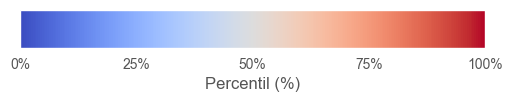

In [73]:
#Descripción de mapa de calor

fig, ax = plt.subplots(figsize=(6, 1))
fig.subplots_adjust(bottom=0.5)

cmap = plt.cm.coolwarm
norm = mpl.colors.Normalize(vmin=0, vmax=1)

cb = mpl.colorbar.ColorbarBase(
    ax, cmap=cmap,
    norm=norm,
    orientation='horizontal'
)

cb.set_label('Percentil (%)')
cb.set_ticks([0, 0.25, 0.5, 0.75, 1])
cb.set_ticklabels(['0%', '25%', '50%', '75%', '100%'])

# Guardar la imagen como PNG
fig.savefig("barra_color_percentil.png", dpi=300, bbox_inches='tight', transparent =True)

plt.show()